# folium이란
folium은 파이썬의 라이브러리로 지도 데이터를 시각화하는데 아주 쉽게 도와줍니다.  
leaflet.js를 기반으로 만들어졌습니다.  
지도에 마커를 표현하거나 범위를 나타내는 다양한 도형을 입력할 수 있습니다.  

In [2]:
import folium
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# 플레이데이터 G밸리캠퍼스 위도, 경도 값
latitude, longitude = (37.468251,126.886212)

In [4]:
# 위의 위도, 경도 값과 줌, 너비, 높이를 정해서 folium.Map 객체를 생성
m = folium.Map(location=[latitude, longitude],
zoom_start=17,
width=750,
height=500
)
folium.Marker([latitude, longitude],
popup="플레이데이터",
tooltip="플레이데이터").add_to(m)         # 해당 위도, 경도 값에 popup과 tooltip을 함께 입력해서 생성한 객체에 마커생성
m

In [5]:
# survey_results_public.csv 파일 Roading
survey_raw_df = pd.read_csv('../data/stack-overflow-developer-survey-2022/survey_results_public.csv', index_col='ResponseId')

In [6]:
# 국가별 위치가 기록된 json 파일 주소를 Roading
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [7]:
# 지도에 활용할 DataFrame 만들기
# 국가별 설문 응답 데이터의 개수를 활용해 지도에 표기하려는 의도
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({'Country': country_counts.index,
'Count': country_counts.values})
country_counts_df

,Country,Count
0,United States of America,13543
1,India,6639
2,Germany,5395
3,United Kingdom of Great Britain and Northern I...,4190
4,Canada,2490
...,...,...
175,Monaco,1
176,Djibouti,1
177,Seychelles,1
178,Solomon Islands,1


## 패스트 인덱싱(at, iat)
pandas.DataFrame.(at, iat)  
대괄호[]를 이용한 인덱싱은 많은 입력을 받을 수 있다.  
하지만 많은 작업을 처리해야 하기 때문에 성능을 그만큼 포기해야한다.  
만약 사용자가 하나의 스칼라 값에만 접근하고 싶다면 .at .iat 메서드를 사용해 성능을 개선할 수 있다.  
이 메서드들은 하나의 스칼라 값에만 접근하는데 특화되어 있고, .loc 및 .iloc 메서드에서 하나의 스칼라 값에 접근하는 방법과 동일하다.  
이 메서드들은 Series, DataFrame 둘 다 적용이 가능하다.  
영어에서 at은 콕 찝는다는 의미를 담고 있는데 이 메서드도 때문에 더 명확한 코드 작성을 위해 사용된다. loc나 iloc보다 처리속도가 빠르다.
### .at 메서드
.at 메서드는 .loc메서드와 동일하게 레이블(label)기반으로 데이터에 접근한다.  
- .at 메서드의 기본적인 구문 형식
1. Series.at[index_label] # Series에서의 사용
2. DataFrame.at[index_label, column_label] # DataFrame에서의 사용
### .iat 메서드
.iloc메서드와 동일하게 위치 정수로 데이터에 접근하는 메서드이다.
- .iat 메서드의 기본적인 구문 형식
1. Series.iat[index_int] # Series에서의 사용
2. DataFrame.iat[index_int, column_int] # DataFrame에서의 사용

In [8]:
country_counts_df.at[12, 'Country']

'Russian Federation'

In [9]:
# json feature.properties.name 값과 csv 에서 가져온 country name이 일치하
# 지 않아 맞춰주는 코드
country_counts_df.at[12, 'Country'] = 'Russia'

In [10]:
# Choropleth는 데이터를 담고 있는 Pandas DataFrame/Series와 기하학 데이터를 담는 
# Geo/TopoJSON를 바인딩하여 쉽게 시각화 표현할 수 있도록 돕는다.

m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=['Country', 'Count'],  # 앞에 반영할 기준을 넣어주고 뒤에 수치를 넣어준다.
    key_on='feature.properties.name',
    threshold_scale=[1, 30 ,100, 300, 1_000, 3_000, 10_000, 14_000], # 모든 값을 포함할 수 있게 범위를 설정해줘야한다.
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Respondents',
).add_to(m)

folium.LayerControl().add_to(m)
m # 지도에 색상이 인코딩되어 표현되어진다.

In [11]:
m.save('Country.html') # 지도 결과 저장하기, 해당 파일을 열면 실행 결과의 지도 모습을 웹 브라우저로 확인할 수 있다.

In [3]:
seoul_geojson="https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
m = folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)
folium.Choropleth(
    geo_data=seoul_geojson,       # 서울시 행정구역을 그리도록 넣어주고 있습니다.
    fill_color="#22AA44",
    fill_opacity=0.4,
    line_opacity=1,
).add_to(m)
m

### folium quickstart link
https://python-visualization.github.io/folium/quickstart.html

# Wordcloud
문자열 내에 단어의 빈도에 따라서 시각화를 진행합니다. 빈도가 많을 수록 글씨를 크게 
표현해서 그림을 그립니다. 다음과 같은 특징을 갖습니다.
- 사용 가능한 모든 공간을 글자로 채웁니다.
- Mask를 사용해서 원하는 모양으로 만들 수 있습니다.

In [14]:
from wordcloud import WordCloud

In [15]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

In [16]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [17]:
survey_df["YearsCode"].replace('Less than 1 year', 0, inplace=True) # 첫번째 인수의 값을 찾아서 두번째 인수로 바꾼다. inplace 인자에 True를 넣으면 inplace 된다.
survey_df["YearsCode"].replace('More than 50 years', 51, inplace=True)
survey_df["YearsCode"] = survey_df["YearsCode"].astype('f')

In [18]:
survey_df["YearsCodePro"].replace('Less than 1 year', 0, inplace=True)
survey_df["YearsCodePro"].replace('More than 50 years', 51, inplace=True)
survey_df["YearsCodePro"] = survey_df["YearsCodePro"].astype('f')


In [19]:
temp_words = survey_raw_df['DevType'].dropna() # DevType에 있는 모든 NaN값을 제거
temp_words = temp_words.str.replace(';',' ').str.replace(',',' ') # 첫번째 인수의 값을 찾아서 두번째 인수로 바꾼다.
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [20]:
# 보기 너비 증가
pd.describe_option()


compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

### 데이터 가공하기
문자열 값을 갖는 Series 내의 값을 단 하나의 문자열로 만들기 위해 join() 메서드를 활용합니다.  
아래에서 결과적으로 words 라는 변수에 Series 에 있는 모든 단어를 공백이란 구분자를 통해 단 하나의 문자열로 합쳤습니다.

In [24]:
words = ' '.join(temp_words)
words[:100]

'Data scientist or machine learning specialist Developer  front-end Engineer  data Engineer  site rel'

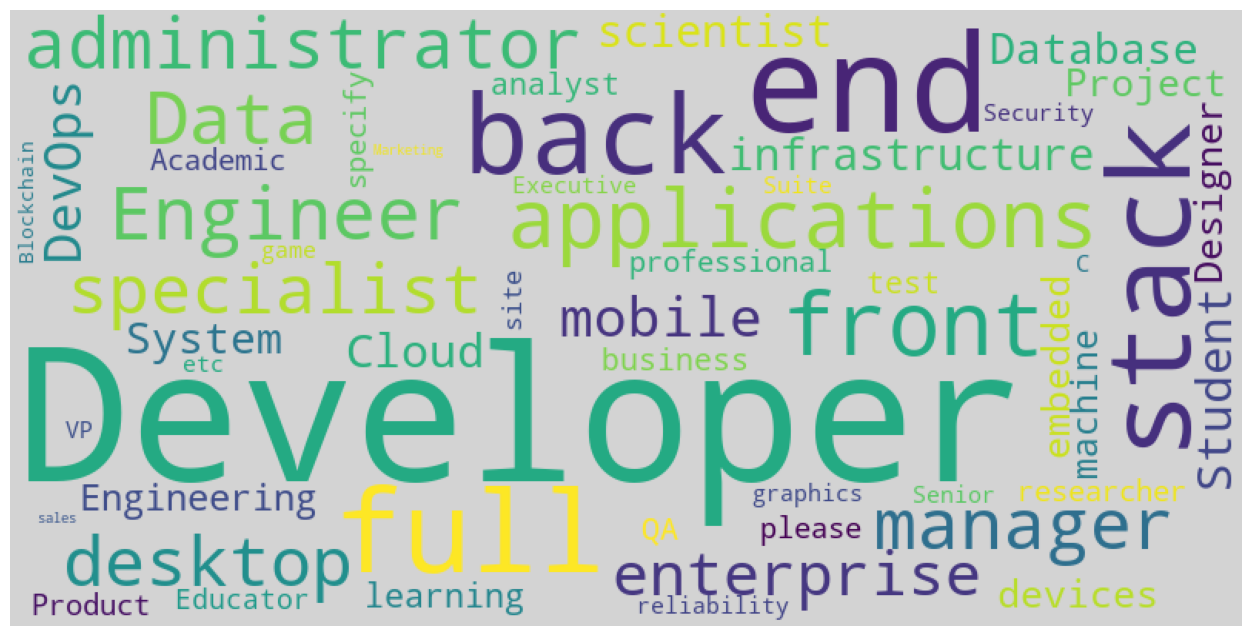

In [26]:
# 한글이 포함되었다면 한글 폰트를 지정해야 한다.
# max_font_size=60 --> 최대 글자 크기를 지정한다.

wc = WordCloud(collocation_threshold=int(1e6),
width=800, height=400,
background_color='lightgrey').generate(words)

plt.figure(figsize=(16,8))

plt.axis('off')

plt.grid(False)
plt.imshow(wc)
plt.show()

In [27]:
wc.to_file('DevType.png')  # 이 명령어로 저장 가능합니다. 다른 이미지 확장자로도 가능합니다.